In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
labels = pd.read_excel(r'Data_labels.xlsx')
labels 

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaT,0.0
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca 2,2.49,1.24 (0.50),1,97,,11,0.1364,0.100629,19-10-2021,2021-10-03,NaT,0.0
150050,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0
150051,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0
150052,139,319,Marca 24,3.49,2.44 (0.30),1,141,Cash,19,0.4636,0.092437,17/10/2021,2021-10-06,2021-10-11,1.0


In [3]:
store = pd.read_excel(r'Data_Store.xlsx')
store 

,idstore,type,selling_square_ft,district
0,1,Large,4762.0,Évora
1,2,Large,12358.0,Bragança
2,3,Large,16159.0,Lisboa
3,4,Large,17903.0,Porto
4,5,Large,16179.0,Coimbra
...,...,...,...,...
337,338,Small,1935.0,Leiria
338,339,Small,2680.0,Portalegre
339,340,Small,866.0,Coimbra
340,341,Small,NaN,Castelo Branco


In [4]:
df = labels.merge(store, on = 'idstore')  # Feito o merge de ambos os datasets pela idstore
df

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaT,0.0,Large,4762.0,Évora
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca 2,2.49,1.24 (0.50),1,97,,11,0.1364,0.100629,19-10-2021,2021-10-03,NaT,0.0,Medium,5048.0,Viseu
150050,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro
150051,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro
150052,139,319,Marca 24,3.49,2.44 (0.30),1,141,Cash,19,0.4636,0.092437,17/10/2021,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre


In [5]:
##df.set_index('idstore', inplace = True) # Colocado o idstore como indice do dataset
##df

In [6]:
df[df.duplicated()] # Verificamos se havia duplicado, mas concluimos que os "duplicados" são artigos únicos com as mesmas caracteristicas, como tal não foram retirados

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
36,7,2,Marca2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaT,0.0,Large,13618.0,Guarda
39,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaT,0.0,Large,13618.0,Guarda
41,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaT,0.0,Large,13618.0,Guarda
42,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaT,0.0,Large,13618.0,Guarda
43,7,2,Marca 2,3.19,2.39 (0.25),1,222,,15,0.3585,0.111111,26/10/2021,2021-10-15,NaT,0.0,Large,13618.0,Guarda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150034,177,318,Marca2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaT,0.0,Small,842.0,Porto
150036,177,318,Marca 2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaT,0.0,Small,842.0,Porto
150038,177,318,Marca 2,2.49,"1,24 (50%)",1,97,,11,0.1364,0.006289,19-10-2021,2021-10-18,NaT,0.0,Small,842.0,Porto
150048,193,318,Marca 2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.100629,19-10-2021,2021-10-03,2021-10-09,1.0,Medium,5048.0,Viseu


#### Identificámos várias entradas duplicadas, mas como esta base de dados terá naturalmente produtos com as mesmas caraterísticas, não faria sentido removê-las.

In [7]:
df.shape

(150054, 18)

In [8]:
df.columns

Index(['idstore', 'sku', 'brand', 'oldpvp', 'new_pvp (discount)', 'labelqty',
       'weight (g)', 'Payment_method', 'Margin (%)', 'Profit (€)',
       'perc_expiring_sku', 'expiring_date', 'labelling_date', 'sell_date',
       'sold', 'type', 'selling_square_ft', 'district'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   idstore             150054 non-null  int64         
 1   sku                 150054 non-null  int64         
 2   brand               150054 non-null  object        
 3   oldpvp              150032 non-null  object        
 4   new_pvp (discount)  150026 non-null  object        
 5   labelqty            150054 non-null  int64         
 6   weight (g)          150050 non-null  object        
 7   Payment_method      150054 non-null  object        
 8   Margin (%)          150054 non-null  int64         
 9   Profit (€)          150054 non-null  float64       
 10  perc_expiring_sku   149929 non-null  float64       
 11  expiring_date       150054 non-null  object        
 12  labelling_date      150054 non-null  datetime64[ns]
 13  sell_date           80511 non

In [10]:
pd.set_option('display.max_columns', None)
print(df.describe())

             idstore            sku  labelqty     Margin (%)     Profit (€)  \
count  150054.000000  150054.000000  150054.0  150054.000000  150054.000000   
mean      139.234242     163.699422       1.0      15.824950       0.175131   
min         1.000000       1.000000       1.0      10.000000       0.034000   
25%        59.000000      99.000000       1.0      13.000000       0.124500   
50%       135.000000     160.000000       1.0      17.000000       0.152900   
75%       212.000000     236.000000       1.0      19.000000       0.222400   
max       332.000000     319.000000       1.0      20.000000      99.900000   
std        87.056044      87.247006       0.0       3.303568       0.268439   

       perc_expiring_sku                 labelling_date  \
count      149929.000000                         150054   
mean            0.385245  2021-10-16 16:41:47.577271808   
min             0.000000            2021-10-01 00:00:00   
25%             0.200000            2021-10-10 00:00

In [11]:
df.skew(numeric_only=True) # Verificamos a distribuição dos dados que nos ajudará a tirar conclusões

idstore                0.166375
sku                   -0.072151
labelqty               0.000000
Margin (%)            -0.374411
Profit (€)           341.717605
perc_expiring_sku      0.261184
sold                  -0.146666
selling_square_ft      1.091003
dtype: float64

In [12]:
df.kurt(numeric_only=True) # Verificámos também se a curtose era elevada em alguma variável 

idstore                  -1.121767
sku                      -1.118777
labelqty                  0.000000
Margin (%)               -1.260135
Profit (€)           126938.236692
perc_expiring_sku        -0.022512
sold                     -1.978515
selling_square_ft         0.693269
dtype: float64

In [13]:
df.describe(include = ['O']) # Analisamos também as variáveis que estavam como objecto (teremos que alterar o tipo de dados mais à frente)

,brand,oldpvp,new_pvp (discount),weight (g),Payment_method,expiring_date,type,district
count,150054,150032.00,150026,150050,150054,150054,150054,150054
unique,328,140.00,396,189,3,84,4,18
top,marca 2,1.19,0.83 (0.30),121,,28/10/2021,Medium,Lisboa
freq,18249,22234.00,18219,9521,69543,4741,62590,14888


In [14]:
df['Payment_method'].value_counts() # Existem métodos de pagamento a vazio, o que faz sentido em casos de artigos que não tenham sido vendidos

Payment_method
        69543
Card    40398
Cash    40113
Name: count, dtype: int64

In [15]:
df['type'].value_counts() #No tipo de loja, existem lojas com o tipo 0, que tem que ser trabalhadas mais à frente

type
Medium    62590
Small     60599
Large     26219
0           646
Name: count, dtype: int64

In [16]:
df['brand'].value_counts() # Verificamos que a brand terá que ser uniformaizada em termos de nome e como tal no passo abaixo fizemos essa uniformização

brand
 marca 2     18249
 Marca 2     17008
marca  2      9077
marca   2     9068
marca2        9043
             ...  
Marca 37         1
 Marca 38        1
Marca 38         1
Marca 1          1
 Marca 42        1
Name: count, Length: 328, dtype: int64

In [17]:
df['labelqty'].value_counts() # Labelqty é sempre 1, o que quer dizer que não nos dá muita informação. Iremos descartá-la mais a frente

labelqty
1    150054
Name: count, dtype: int64

In [18]:
df["brand"] = df["brand"].astype(str).str.strip().str.capitalize()

df["brand"] = df["brand"].str.replace(r'(\D+)(\d+)', r'\1 \2', regex=True)
df["brand"] = df["brand"].str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces

print(df["brand"].unique())


['Marca 1' 'Marca 2' 'Marca 3' 'Marca 4' 'Marca 5' 'Marca 6' 'Marca 7'
 'Marca 8' 'Marca 9' 'Marca 10' 'Marca 11' 'Marca 12' 'Marca 13'
 'Marca 14' 'Marca 15' 'Marca 16' 'Marca 17' 'Marca 18' 'Marca 19'
 'Marca 20' 'Marca 21' 'Marca 22' 'Marca 23' 'Marca 24' 'Marca 25'
 'Marca 26' 'Marca 27' 'Marca 28' 'Marca 29' 'Marca 30' 'Marca 31'
 'Marca 32' 'Marca 33' 'Marca 34' 'Marca 35' 'Marca 36' 'Marca 37'
 'Marca 38' 'Marca 39' 'Marca 40' 'Marca 41' 'Marca 42']


Vimos anteriormente que a variável “brand” tinha muitas entradas diferentes para o que era suposto ser a mesma marca:

- Em primeiro lugar, certificámo-nos de alterar a variável para string e de colocar todas as entradas em maiúsculas;
- Em segundo lugar, certificamo-nos de que cada entrada é composta por um grupo de caracteres sem dígitos (\D+) e um grupo de caracteres com dígitos (\d+) separados por um espaço;
- Em terceiro lugar, certificamo-nos de que, se existirem vários espaços entre os dois grupos, estes são substituídos por apenas um espaço;

Isto normalizou todas as entradas diferentes.

In [19]:
df['brand'].value_counts() #Brands já todas uniformizadas

brand
Marca 2     106163
Marca 7      15428
Marca 15     12543
Marca 5       5418
Marca 12      1760
Marca 25      1279
Marca 9       1126
Marca 3        880
Marca 33       846
Marca 28       725
Marca 8        539
Marca 4        513
Marca 21       481
Marca 26       470
Marca 17       258
Marca 6        227
Marca 16       185
Marca 29       175
Marca 22       131
Marca 13       113
Marca 23       111
Marca 10       101
Marca 41        93
Marca 18        86
Marca 20        83
Marca 40        73
Marca 27        71
Marca 24        61
Marca 32        48
Marca 1         14
Marca 11        10
Marca 31         9
Marca 36         8
Marca 37         8
Marca 19         5
Marca 39         4
Marca 38         2
Marca 14         2
Marca 42         2
Marca 30         1
Marca 34         1
Marca 35         1
Name: count, dtype: int64

In [20]:
precos = []
descontos = []

for valor in labels['new_pvp (discount)']:
    if pd.isna(valor) or valor == 'nan':
        precos.append(np.nan)
        descontos.append(np.nan)
    else:
        match = re.match(r"([\d,\.]+)\s*\(([\d,\.%]+)\)", valor)
        if match:
            preco = match.group(1).replace(',', '.')
            desconto = match.group(2).replace(',', '.')
            
            if '%' in desconto:
                desconto = str(float(desconto.replace('%', '')) / 100)
            
            precos.append(float(preco))
            descontos.append(float(desconto))
        else:
            precos.append(np.nan)
            descontos.append(np.nan)

Identificámos anteriormente que a coluna “new_pvp (discount)” é composta por duas variáveis diferentes “new_pvp” e “discount”, uma vez que seria impossível analisar estas duas variáveis enquanto estivessem estruturadas desta forma, decidimos transformá-las em duas variáveis separadas. Começamos por definir uma função "for" que percorrerá todas as entradas desta variável:

- Em primeiro lugar, definimos que, se a entrada for nula, será acrescentada uma entrada nula às nossas novas variáveis “preço” e “desconto”, de modo a podermos representar com êxito entradas nulas em ambas as variáveis;
- Em segundo lugar, definimos que, se o input captar um valor de preço e de desconto separado por um espaço, o primeiro será introduzido em “preço” e o segundo em “desconto";
- Em terceiro lugar, definimos que, se o novo valor de desconto capturado tiver um sinal de %, é substituído por uma percentagem em formato decimal;
- Por fim, definimos que, em todos os outros cenários, anexamos valores nulos a ambas as variáveis.

Como resultado, criámos duas novas variáveis “new_pvp” e “discount”.

In [21]:
df['new_pvp'] = precos
df['discount'] = descontos

In [22]:
df['weight (g)'] = pd.to_numeric(df['weight (g)'], errors='coerce').fillna(0).astype(int) # Colocamos o weight em númerico
df

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,new_pvp,discount
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca 2,2.49,1.24 (0.50),1,97,,11,0.1364,0.100629,19-10-2021,2021-10-03,NaT,0.0,Medium,5048.0,Viseu,1.24,0.5
150050,203,318,Marca 2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150051,203,318,Marca 2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150052,139,319,Marca 24,3.49,2.44 (0.30),1,141,Cash,19,0.4636,0.092437,17/10/2021,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre,2.44,0.3


In [23]:
df = df.drop(columns=['new_pvp (discount)', 'labelqty'])

Como vimos anteriormente, criámos as colunas “new_pvp” e “discount”, sendo que podemos eliminar a antiga coluna “new_pvp (discount)”.

Adicionalmente, identificámos que a coluna “labelqty” é composta apenas por um valor, logo  não ajudará na nossa modelação.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idstore            150054 non-null  int64         
 1   sku                150054 non-null  int64         
 2   brand              150054 non-null  object        
 3   oldpvp             150032 non-null  object        
 4   weight (g)         150054 non-null  int32         
 5   Payment_method     150054 non-null  object        
 6   Margin (%)         150054 non-null  int64         
 7   Profit (€)         150054 non-null  float64       
 8   perc_expiring_sku  149929 non-null  float64       
 9   expiring_date      150054 non-null  object        
 10  labelling_date     150054 non-null  datetime64[ns]
 11  sell_date          80511 non-null   datetime64[ns]
 12  sold               149940 non-null  float64       
 13  type               150054 non-null  object  

#### Começamos a tratar os null

In [25]:
null_count = df['perc_expiring_sku'].isna().sum()

# Exibir o resultado
print(f"Número de valores nulos em 'perc_expiring_sku': {null_count}")

Número de valores nulos em 'perc_expiring_sku': 125


In [26]:
# Criar condição para substituir valores nulos em perc_expiring_sku por 0
condition = (df["expiring_date"] == df["labelling_date"]) & df["perc_expiring_sku"].isna()

# Aplicar a substituição
df.loc[condition, "perc_expiring_sku"] = 0

Identificámos que a variável “perc_expiring_sku” apresentava valores nulos quando as variáveis “expiring_date” e “labelling_date” eram iguais, o que faz sentido uma vez que esta variável é a diferença de tempo entre as duas, no entanto queremos que estes valores sejam 0 em vez de nulos, como tal trocámo-los pelo valor correto.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idstore            150054 non-null  int64         
 1   sku                150054 non-null  int64         
 2   brand              150054 non-null  object        
 3   oldpvp             150032 non-null  object        
 4   weight (g)         150054 non-null  int32         
 5   Payment_method     150054 non-null  object        
 6   Margin (%)         150054 non-null  int64         
 7   Profit (€)         150054 non-null  float64       
 8   perc_expiring_sku  149974 non-null  float64       
 9   expiring_date      150054 non-null  object        
 10  labelling_date     150054 non-null  datetime64[ns]
 11  sell_date          80511 non-null   datetime64[ns]
 12  sold               149940 non-null  float64       
 13  type               150054 non-null  object  

In [28]:
df['expiring_date'] = df['expiring_date'].astype(str)

In [29]:
df['expiring_date'] = df['expiring_date'].str.replace("-", "/")

In [30]:
df['expiring_date'] = pd.to_datetime(df['expiring_date'], format = "%d/%m/%Y")

Indentificá-mos um problema em que a variável “expiring_date” tinha diferentes formatos e separadores, o que tornava impossível mudá-la simplesmente para uma variável date_time sem primeiro normalizar as datas nesta coluna:
- Em primeiro lugar, mudámos a coluna para string para manipular mais facilmente os formatos de data
- Padronizamos todos os separadores
- Introduzimos a variável como uma variável datetime com o formato Dia/Mês/Ano

In [31]:
df["exp_days_label"] = (df["expiring_date"] - df["labelling_date"]).dt.days

Foi criada a variável "exp_days_label", que indica o número de dias restantes até a expiração de um produto desde a sua data de rotulagem.

In [32]:
null_skus = df[df["perc_expiring_sku"].isna()]

df["perc_expiring_sku"] = df.groupby("exp_days_label")["perc_expiring_sku"].transform(lambda x: x.fillna(x.mean()))

df["perc_expiring_sku"].fillna(df["perc_expiring_sku"].mean(), inplace=True)

Identificámos os valores em falta na variável “perc_expiring_sku” e substituímo-los pela média da variável:
- Em primeiro lugar, ordenar a coluna por grupos de “exp_days_label” para obter uma média mais exacta dos valores não omissos;
- Em segundo lugar, se após a primeira transformação ainda existirem valores em falta, estes são substituídos pela média da coluna global.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idstore            150054 non-null  int64         
 1   sku                150054 non-null  int64         
 2   brand              150054 non-null  object        
 3   oldpvp             150032 non-null  object        
 4   weight (g)         150054 non-null  int32         
 5   Payment_method     150054 non-null  object        
 6   Margin (%)         150054 non-null  int64         
 7   Profit (€)         150054 non-null  float64       
 8   perc_expiring_sku  150054 non-null  float64       
 9   expiring_date      150054 non-null  datetime64[ns]
 10  labelling_date     150054 non-null  datetime64[ns]
 11  sell_date          80511 non-null   datetime64[ns]
 12  sold               149940 non-null  float64       
 13  type               150054 non-null  object  

In [34]:
# Filtrar registros onde 'sold' é NaN e o método de pagamento é 'Cash' ou 'Card'
na_sold_cash_or_card = df[(df['sold'].isna()) & (df['Payment_method'].isin(['Cash', 'Card']))]
# Contar quantos registros atendem a essas condições
contagem_na_sold_cash_or_card = na_sold_cash_or_card.shape[0]
print(f'O número de registros onde "sold" é NaN e o método de pagamento é "Cash" ou "Card" é: {contagem_na_sold_cash_or_card}')
# Contar para 'Cash'
contagem_na_sold_cash = df[(df['sold'].isna()) & (df['Payment_method'] == 'Cash')].shape[0]
# Contar para 'Card'
contagem_na_sold_card = df[(df['sold'].isna()) & (df['Payment_method'] == 'Card')].shape[0]
print(f'O número de registros onde "sold" é NaN e o método de pagamento é "Cash" é: {contagem_na_sold_cash}')
print(f'O número de registros onde "sold" é NaN e o método de pagamento é "Card" é: {contagem_na_sold_card}')

O número de registros onde "sold" é NaN e o método de pagamento é "Cash" ou "Card" é: 58
O número de registros onde "sold" é NaN e o método de pagamento é "Cash" é: 32
O número de registros onde "sold" é NaN e o método de pagamento é "Card" é: 26


In [35]:
df.drop(columns=["selling_square_ft"], inplace=True)

Eliminámos a variável “selling_square_ft”, por não a considerarmos relevante para a nossa modelação.

In [36]:
df['sold'] = df['Payment_method'].isin(['Cash', 'Card']).astype(int)

Identificámos anteriormente que alguns inputs na coluna “sold” eram nulos, apesar de terem uma listagem para uma sell_date e um método de pagamento, pelo que especificámos que se existisse um método de pagamento para qualquer input, este seria considerado como vendido e vice-versa

In [37]:
df['expiring_days'] = (df['expiring_date'] - df['labelling_date']).dt.days / df['perc_expiring_sku']

Criou uma nova variável denominada “expiring_days”, que, tal como o nome indica, mede a proporção, por SKU, do prazo de validade restante desse produto específico

In [38]:
df['expiring_days'] = df['expiring_days'].fillna(0)

Substituir todos os valores em falta em “expiring_days” por 0

In [39]:
sold_count = df['sold'].fillna(0).astype(int).sum()
sold_count

80511

In [40]:
df['oldpvp'] = df['oldpvp'].astype(str).str.replace(',', '.').astype(float)

Certificámo-nos de que a variável “oldpvp” estava a ser interpretada como string, substituí-mos todos os “,” por “.” para normalizar a separação decimal e depois mudámos o tipo de variável para um floating.

In [41]:
df['oldpvp'] = pd.to_numeric(df['oldpvp'], errors='coerce') 
df['new_pvp'] = pd.to_numeric(df['new_pvp'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

Mudámos as variáveis preço e desconto para numéricas, especificando que todos os erros que o programa encontrasse ao executar este código seriam introduzidos como um valor nulo.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idstore            150054 non-null  int64         
 1   sku                150054 non-null  int64         
 2   brand              150054 non-null  object        
 3   oldpvp             150032 non-null  float64       
 4   weight (g)         150054 non-null  int32         
 5   Payment_method     150054 non-null  object        
 6   Margin (%)         150054 non-null  int64         
 7   Profit (€)         150054 non-null  float64       
 8   perc_expiring_sku  150054 non-null  float64       
 9   expiring_date      150054 non-null  datetime64[ns]
 10  labelling_date     150054 non-null  datetime64[ns]
 11  sell_date          80511 non-null   datetime64[ns]
 12  sold               150054 non-null  int32         
 13  type               150054 non-null  object  

In [43]:
df['brand'].value_counts()

brand
Marca 2     106163
Marca 7      15428
Marca 15     12543
Marca 5       5418
Marca 12      1760
Marca 25      1279
Marca 9       1126
Marca 3        880
Marca 33       846
Marca 28       725
Marca 8        539
Marca 4        513
Marca 21       481
Marca 26       470
Marca 17       258
Marca 6        227
Marca 16       185
Marca 29       175
Marca 22       131
Marca 13       113
Marca 23       111
Marca 10       101
Marca 41        93
Marca 18        86
Marca 20        83
Marca 40        73
Marca 27        71
Marca 24        61
Marca 32        48
Marca 1         14
Marca 11        10
Marca 31         9
Marca 36         8
Marca 37         8
Marca 19         5
Marca 39         4
Marca 38         2
Marca 14         2
Marca 42         2
Marca 30         1
Marca 34         1
Marca 35         1
Name: count, dtype: int64

In [44]:
df['type'].value_counts()

type
Medium    62590
Small     60599
Large     26219
0           646
Name: count, dtype: int64

In [45]:
mode = df['type'].mode()[0]
df['type'] = df['type'].replace(0, mode)

Substituir todos os valores 0 na variável “type” pela moda.

In [46]:
df["discount_rounded"] = np.round(df["discount"] / 0.05) * 0.05
df["discount_rounded"].value_counts()

discount_rounded
0.30    139346
0.25      4969
0.50      3649
0.20      1175
0.15       522
0.10       317
0.40        26
0.35        12
0.05         6
0.00         3
1.00         1
Name: count, dtype: int64

Padronização de todos os valores de desconto para o décimo mais próximo.

In [47]:
df['sell_date'] = df['sell_date'].fillna(pd.NaT)
df['sell_date'] = pd.to_datetime(df['sell_date'])

#Verificar que dá nat 

In [48]:
df['sku'] = df['sku'].astype('object')
df['sold'] = df['sold'].astype('int64')
df['idstore'] = df['idstore'].astype('object')

In [49]:
#Criar dia da semana que foi etiquetado
df["labelling_weekday"] = df["labelling_date"].dt.day_name()
#Criar dia que foi etiquetado
df["labelling_day"] = df["labelling_date"].dt.day
#Criar mes que foi etiquetado
df["labelling_month"] = df["labelling_date"].dt.month

In [50]:
#Criar dia da semana que foi vendido
df["sell_weekday"] = df["sell_date"].dt.day_name()
#Criar dia que foi vendido
df["sell_day"] = df["sell_date"].dt.day
#Criar mes que foi vendido
df["sell_month"] = df["sell_date"].dt.month

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idstore            150054 non-null  object        
 1   sku                150054 non-null  object        
 2   brand              150054 non-null  object        
 3   oldpvp             150032 non-null  float64       
 4   weight (g)         150054 non-null  int32         
 5   Payment_method     150054 non-null  object        
 6   Margin (%)         150054 non-null  int64         
 7   Profit (€)         150054 non-null  float64       
 8   perc_expiring_sku  150054 non-null  float64       
 9   expiring_date      150054 non-null  datetime64[ns]
 10  labelling_date     150054 non-null  datetime64[ns]
 11  sell_date          80511 non-null   datetime64[ns]
 12  sold               150054 non-null  int64         
 13  type               150054 non-null  object  

In [52]:
df.describe()

,oldpvp,weight (g),Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,new_pvp,discount,exp_days_label,expiring_days,discount_rounded,labelling_day,labelling_month,sell_day,sell_month
count,150032.000000,150054.000000,150054.000000,150054.000000,150054.000000,150054,150054,80511,150054.000000,150026.000000,150026.000000,150054.000000,150054.000000,150026.000000,150054.00000,150054.0,80511.000000,80511.000000
mean,1.583495,163.016068,15.824950,0.175131,0.385084,2021-10-18 04:15:04.570354944,2021-10-16 16:41:47.577271808,2021-10-17 18:22:01.846704384,0.536547,1.100699,0.302269,1.481447,5.900619,0.301491,16.69569,10.0,17.482294,10.009129
min,0.590000,0.000000,10.000000,0.034000,0.000000,2021-10-01 00:00:00,2021-10-01 00:00:00,2021-10-01 00:00:00,0.000000,0.027900,0.010000,0.000000,0.000000,0.000000,1.00000,10.0,1.000000,10.000000
25%,1.190000,123.000000,13.000000,0.124500,0.200000,2021-10-11 00:00:00,2021-10-10 00:00:00,2021-10-11 00:00:00,0.000000,0.830000,0.300000,1.000000,3.000000,0.300000,10.00000,10.0,11.000000,10.000000
50%,1.590000,166.000000,17.000000,0.152900,0.333333,2021-10-19 00:00:00,2021-10-17 00:00:00,2021-10-18 00:00:00,1.000000,1.110000,0.300000,1.000000,3.000000,0.300000,17.00000,10.0,18.000000,10.000000
75%,1.890000,192.000000,19.000000,0.222400,0.666667,2021-10-26 00:00:00,2021-10-25 00:00:00,2021-10-25 00:00:00,1.000000,1.320000,0.300000,2.000000,5.000000,0.300000,25.00000,10.0,25.000000,10.000000
max,999.000000,410.000000,20.000000,99.900000,2.000000,2021-11-20 00:00:00,2021-10-31 00:00:00,2021-11-18 00:00:00,1.000000,499.500000,0.990000,25.000000,359.000000,1.000000,31.00000,10.0,31.000000,11.000000
std,2.936689,58.328693,3.303568,0.268439,0.223669,NaN,NaN,NaN,0.498664,1.491332,0.036940,1.320806,20.710010,0.036112,8.60839,0.0,8.315419,0.095110


In [53]:
df.loc[df['oldpvp'].isnull(), 'oldpvp'] = df['new_pvp'] / (1 - df['discount_rounded'] / 100)
df.loc[df['new_pvp'].isnull(), 'new_pvp'] = df['oldpvp'] * (1 - df['discount_rounded'] / 100)
df.loc[df['discount_rounded'].isnull(), 'discount_rounded'] = (1 - df['new_pvp'] / df['oldpvp']) * 100

Utilizando a relação entre as variáveis “old_pvp”, “new_pvp” e “discount_rounded”, corrigimos quaisquer possíveis valores em falta em cada variável, calculando o seu valor implícito com base nas entradas das outras duas variáveis.

In [54]:
df['new_pvp'] = df.groupby('sku')['new_pvp'].transform(lambda x: x.replace(0, x[x > 0].mode()[0] if not x[x > 0].mode().empty else 0)).fillna(df.groupby('sku')['new_pvp'].transform('first'))
df['discount_rounded'] = df.groupby('sku')['discount_rounded'].transform(lambda x: x.replace(0, x[x > 0].mode()[0] if not x[x > 0].mode().empty else 0)).fillna(df.groupby('sku')['discount'].transform('first'))

Para tratar os valores em falta em “new_pvp”, agrupámos a variável por “sku”, de modo a analisar os valores em falta no mesmo grupo de produtos. Iterando por cada grupo de produtos, substituímos os valores nulos correspondentes na variável "new_pvp", com base em duas condições:
- Se o grupo de produtos específico fosse composto apenas por valores não positivos, os valores em falta seriam substituídos por um 0;
- Caso contrário, substituímos os valores em falta pela moda.

Por último, substituímos quaisquer valores ainda em falta pelo primeiro valor não nulo no grupo “sku” específico.

Fazemos o mesmo para a variável “discount_rounded".

In [55]:
df

,idstore,sku,brand,oldpvp,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,district,new_pvp,discount,exp_days_label,expiring_days,discount_rounded,labelling_weekday,labelling_day,labelling_month,sell_weekday,sell_day,sell_month
0,1,1,Marca 1,4.22,260,Card,16,0.3376,0.010050,2021-10-03,2021-10-01,2021-10-02,1,Large,Évora,2.11,0.5,2,199.0,0.5,Friday,1,10,Saturday,2.0,10.0
1,1,1,Marca 1,3.96,260,,16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0,Large,Évora,1.98,0.5,1,199.0,0.5,Friday,1,10,NaN,NaN,NaN
2,1,1,Marca 1,4.74,260,Cash,16,0.3792,0.010050,2021-10-03,2021-10-01,2021-10-03,1,Large,Évora,2.37,0.5,2,199.0,0.5,Friday,1,10,Sunday,3.0,10.0
3,1,1,Marca 1,4.20,260,Card,16,0.3360,0.010050,2021-10-03,2021-10-01,2021-10-02,1,Large,Évora,2.10,0.5,2,199.0,0.5,Friday,1,10,Saturday,2.0,10.0
4,1,1,Marca 1,4.62,260,Cash,16,0.3696,0.010050,2021-10-03,2021-10-01,2021-10-03,1,Large,Évora,2.31,0.5,2,199.0,0.5,Friday,1,10,Sunday,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca 2,2.49,97,,11,0.1364,0.100629,2021-10-19,2021-10-03,NaT,0,Medium,Viseu,1.24,0.5,16,159.0,0.5,Sunday,3,10,NaN,NaN,NaN
150050,203,318,Marca 2,2.49,97,Cash,11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1,Medium,Faro,1.24,0.5,18,159.0,0.5,Friday,1,10,Saturday,2.0,10.0
150051,203,318,Marca 2,2.49,97,Cash,11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1,Medium,Faro,1.24,0.5,18,159.0,0.5,Friday,1,10,Saturday,2.0,10.0
150052,139,319,Marca 24,3.49,141,Cash,19,0.4636,0.092437,2021-10-17,2021-10-06,2021-10-11,1,Small,Portalegre,2.44,0.3,11,119.0,0.3,Wednesday,6,10,Monday,11.0,10.0


In [56]:
df['label_till_sale'] = (df['sell_date'] - df['labelling_date']).dt.days
df['label_till_sale'] = df['label_till_sale'].fillna(0)

In [57]:
df['exp_till_sale'] = (df['expiring_date'] - df['sell_date']).dt.days
df['exp_till_sale'] = df['exp_till_sale'].fillna(0)

Criação de duas novas variáveis:
- “Label_till_sale” calcula a diferença entre “sell_date” e “labelling_date”, mostrando efetivamente a quantidade de dias que um produto demorou a ser vendido depois de ser etiquetado;
- A variável “exp_till_sale” faz o mesmo, mas mostra o número de dias que um produto ainda tinha no seu prazo de validade quando foi vendido.

Os valores em falta de ambas as variáveis foram preenchidos com 0.

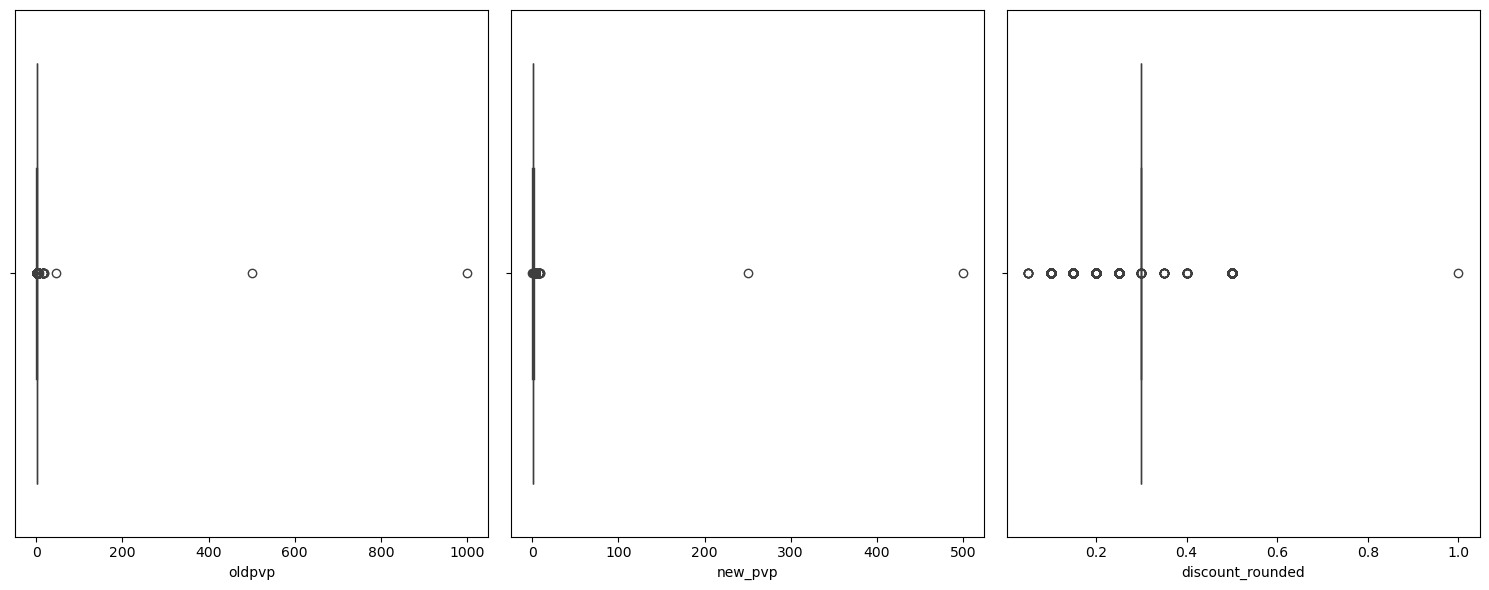

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(ax=ax1, data=df, x='oldpvp')
sns.boxplot(ax=ax2, data=df, x='new_pvp')
sns.boxplot(ax=ax3, data=df, x='discount_rounded')

plt.tight_layout()
plt.show()

In [59]:
sku_old_pvp_outliers = df[df['oldpvp'] > 400]['sku']
sku_discount_rounded_outliers = df[df['discount_rounded'] == 1]['sku']

# Mostrar o resultado
print(sku_old_pvp_outliers.tolist())
print(sku_discount_rounded_outliers.tolist())

[4, 108]
[4]


In [60]:
df['oldpvp'] = df.groupby('sku')['oldpvp'].transform(lambda x: x.replace(46, x[x > 0].mode()[0] if not x[x > 0].mode().empty else 0)).fillna(df.groupby('sku')['oldpvp'].transform('first'))

df = df.drop(df[(df['oldpvp'] > 400) | (df['discount_rounded'] == 1)].index)

Identificámos um valor atípico de “46” na variável “oldpvp”, que substituímos pela moda desse grupo específico de preços.

Além disso, removemos entrads superiores aa4500, uma vez que erma obviamenta entradsa erradsa, e também removemos todas as entradas de 100% de desconto

In [61]:
output_file = "data_model.xlsx"
df.to_excel(output_file, index=False)